<img src="./Img/logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II
# Tarea Semanal 7
## 05-09-2023
#### Autor: Yañez $\lambda$, Joaquin

## Consigna

Esta tarea se centra en la implementación de filtros digitales, se evalua la transformación de un filtro analógico a uno digital, implementación de filtros FIR e IIR y por último el análisis de un diagrama en bloques. Dos de los ejercicios enviados se encuentran en la guía de ejercicios de la cátedra y el tercero es uno aparte propuesto para esat tarea semanal. Como se tratan de filtros digitales el análisis circuital carece de sentido de hacerlo, en su lugar se realizará un análisis con la herramienta de diseño de filtros de python (pyfda).

### Ejercicio 1:

Se pide realizar el 2 ejercicio de la guía de filtros digitales, el enunciado es el siguiente:

![Texto alternativo](./Img/Ej1_consigna.png "Imagen 1. Consigna del 1er punto")

<center>  Imagen 1. Consigna del 1er punto </center>

Se observa que se pide transformar un filtro butter análógico a uno digital con distintas frecuencias de corte y frecuencias de muestreo por lo que en papel se aplicó la transferencia bilineal a un filtro de segundo orden generalizado y luego se lo especifíca para el caso en partiular pedido.

A continuación se muestra el análisis del problema en papel:

In [1]:
from IPython.display import IFrame
IFrame("./Src/TS7_E1.pdf", width=1000, height=800)

Una vez llegado al resultado se aprecia que todos los parámetros del filtro dependen de la $f_s$ elegida y de su relación con la $ \omega_c $ del filtro elegido. Se observa como con la convinación de valores del punto A) los polos se acercan mucho a la circunferencia unitaria.


### Simulación numérica

In [2]:
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys


### DEFINICIÓN DE VARIABLES
fc = 1 # En kHz
fs = 100 #En kHz 

Ww = fs


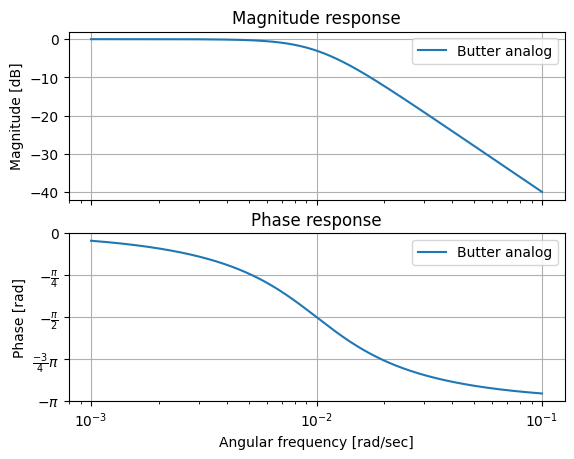

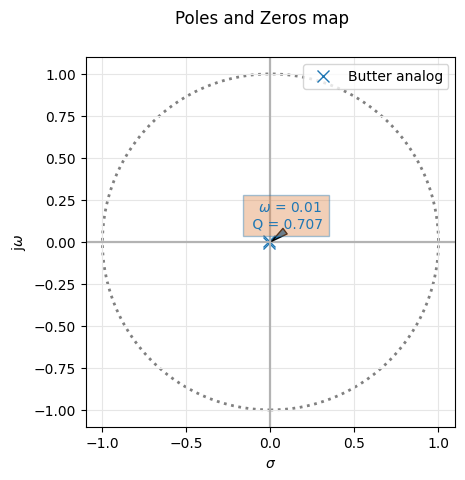

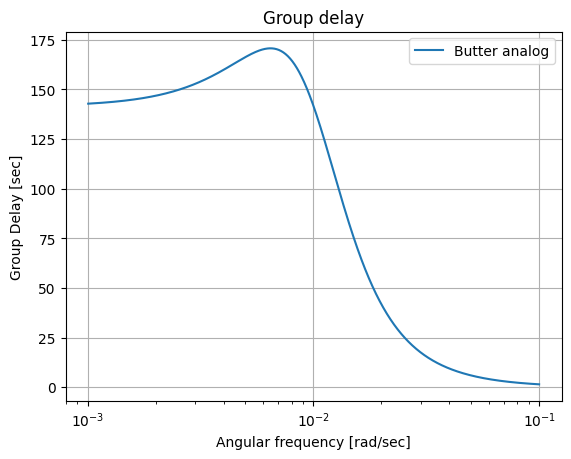

In [3]:
### ARMADO DEL FILTRO ANALÓGICO

zz, pp, kk = sig.buttap(2)
zz, pp, kk = sig.lp2lp_zpk(zz, pp, kk, wo = fc/Ww)
### Se dezplaza el filtro original ya que la normalización se hace para que K=2

num, den = sig.zpk2tf(zz, pp, kk)
TF = sig.TransferFunction(num, den)
analyze_sys(TF, sys_name = "Butter analog")

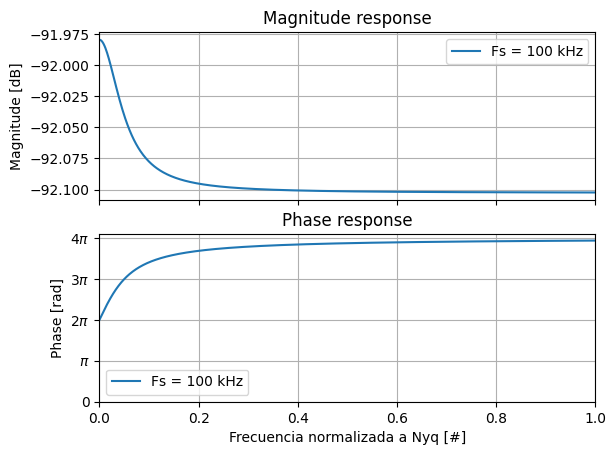

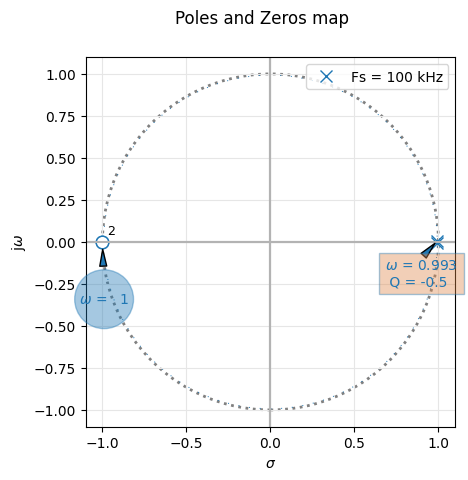

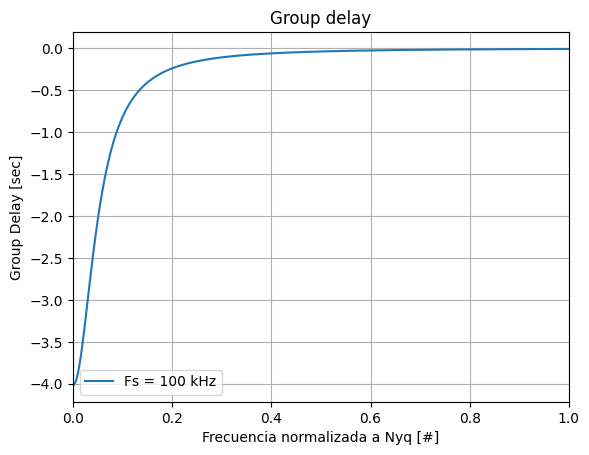

In [4]:
### ARMMADO DEL FILTRO DIGITAL

z, p, k = sig.bilinear_zpk(zz, pp, kk, fs/Ww)

numz , denz = sig.zpk2tf(z, p, k)
TFZ = sig.TransferFunction(numz, denz)

analyze_sys(TFZ, sys_name = "Fs = 100 kHz", digital = True)

Se observa como era de esperarse que los polos se acerquen considerablemente a la circunferencia unitaria, además como la fs es tan alta se mapea principalmente la banda de detenida por lo que la atenuación es considerable en casi todas las frecuencias.

A continuación se realiza el mismo análisis pero para una $f_s$ 10 veces menor.

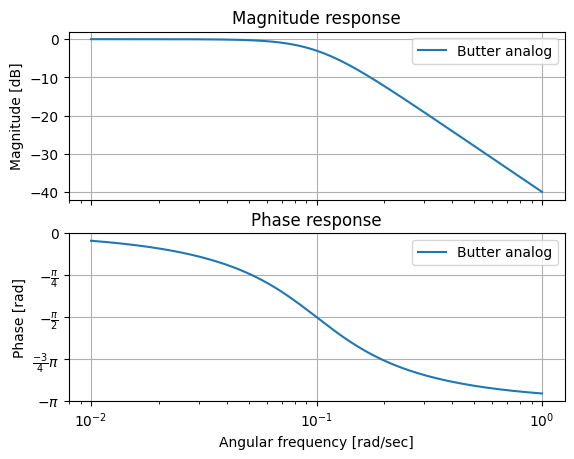

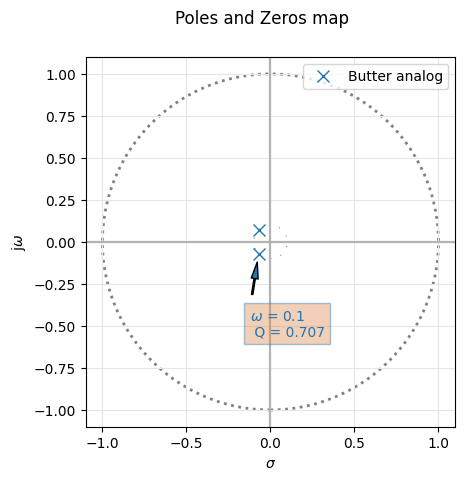

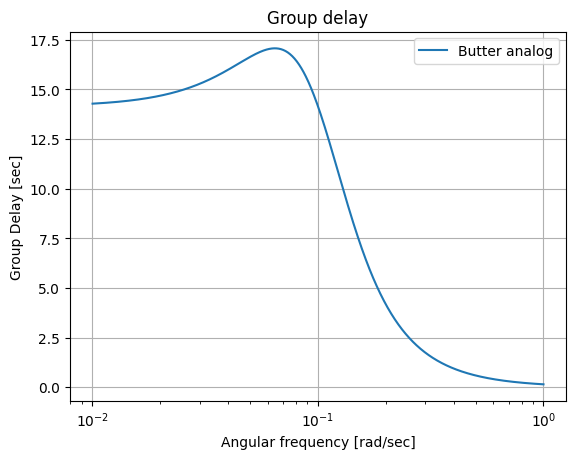

In [5]:
### ARMADO DEL BUTTER ANALOGICO DE NUEVO
fs = 10 # en kHz
Ww = fs

zz, pp, kk = sig.buttap(2)
zz, pp, kk = sig.lp2lp_zpk(zz, pp, kk, wo = fc/Ww)
### Se dezplaza el filtro original ya que la normalización se hace para que K=2

num, den = sig.zpk2tf(zz, pp, kk)
TF = sig.TransferFunction(num, den)
analyze_sys(TF, sys_name = "Butter analog")

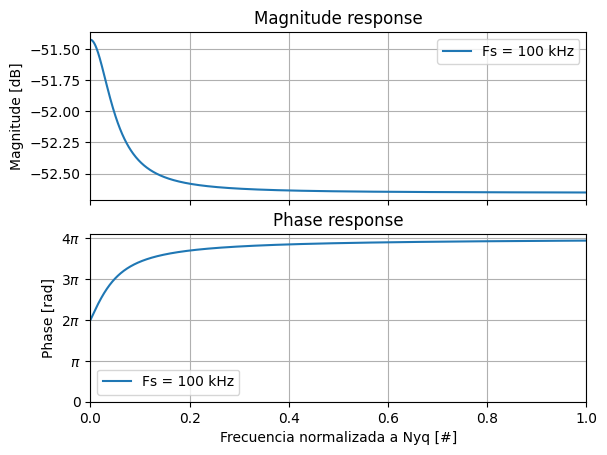

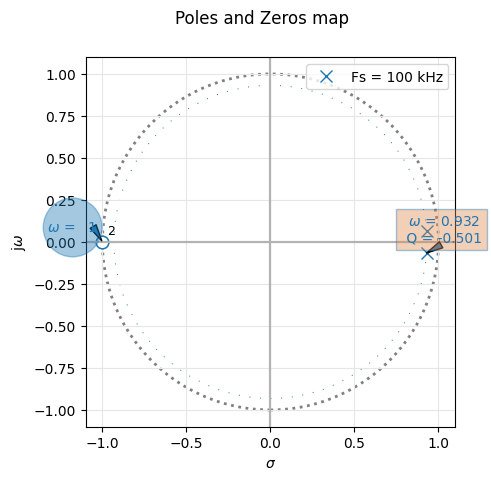

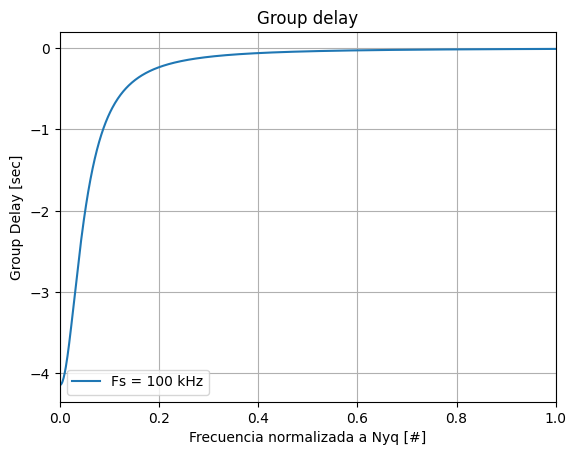

In [6]:
### ARMMADO DEL FILTRO DIGITAL

z, p, k = sig.bilinear_zpk(zz, pp, kk, fs/Ww)

numz , denz = sig.zpk2tf(z, p, k)
TFZ = sig.TransferFunction(numz, denz)

analyze_sys(TFZ, sys_name = "Fs = 100 kHz", digital = True)

Se observa como los polos se alejan un poco de la circunferencia unitaria pero estos siguen bastantes cercano.
Para el punto C) se pide realizar el mismo trabajo pero para un pasaaltos, a continuación se realiza el análisis en papel de la transformación bilineal.

In [7]:
IFrame("./Src/TS7_E1_C.pdf", width=1000, height=800)

Esta vez a diferencia del pasabajos el cero doble queda en $1+j0$ introduciendo un cero doble en continua como era de esperarse. A continuación se realiza un análisis numérico del ejercicio

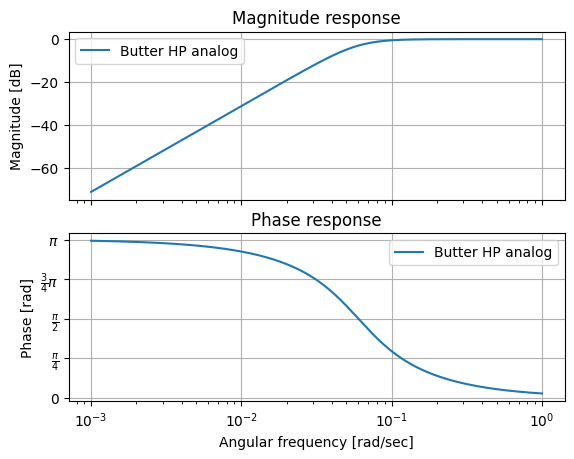

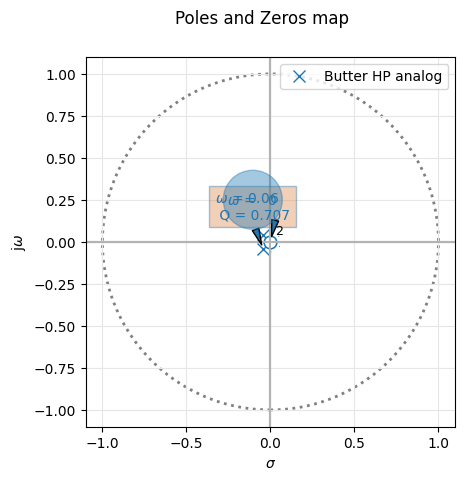

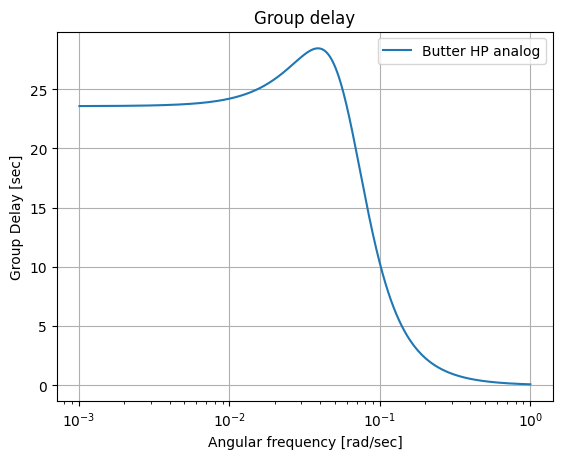

In [8]:
fc = 6 # En kHz
fs = 100 #En kHz 

Ww = fs

zz, pp, kk = sig.buttap(2)

zz, pp, kk = sig.lp2hp_zpk(zz, pp, kk, wo = fc/Ww)


num, den = sig.zpk2tf(zz, pp, kk)
TF = sig.TransferFunction(num, den)
 
analyze_sys(TF, sys_name = "Butter HP analog")

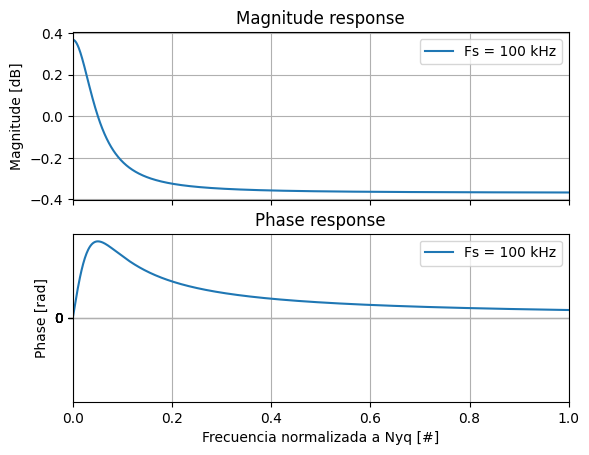

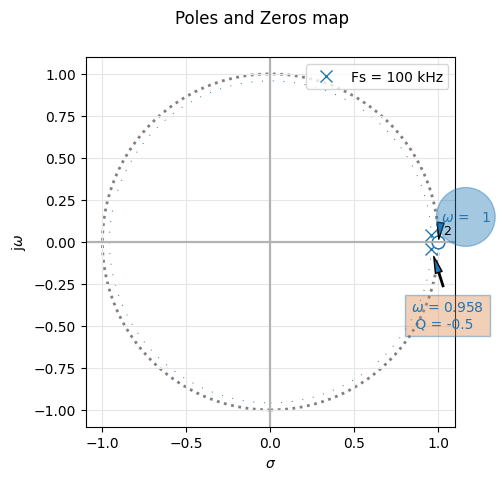

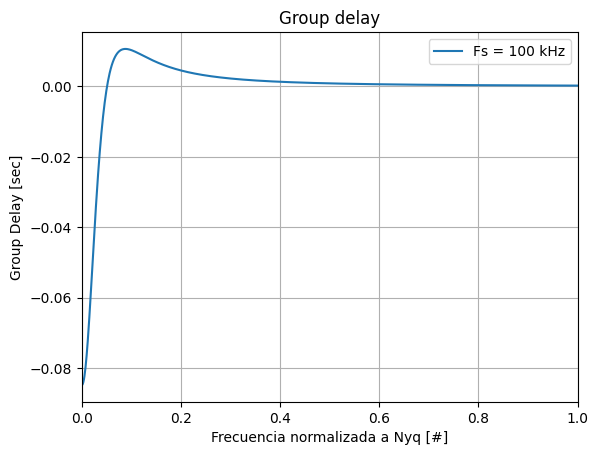

In [9]:
z, p, k = sig.bilinear_zpk(zz, pp, kk, fs/Ww)

numz , denz = sig.zpk2tf(z, p, k)

TFZ = sig.TransferFunction(numz, denz)

analyze_sys(TFZ, sys_name = "Fs = 100 kHz", digital = True)

D) De todos los casos analizados el único que justificaría utilizar prewarping sería el que tiene $f_s = 10 kHz$ ya que en las otras transferencias se realiza un mapeo con una buena distancia entre Nyquist y la frecuencia de corte del filtro. 

***

### Ejercicio 2:

Se pide realizar el 3er ejercicio de la guía de filtros digitales, el enunciado es el siguiente:

![Texto alternativo](./Img/Ej2_consigna_a.png "Imagen 2. Consigna del 2do punto parte A")
![Texto alternativo](./Img/Ej2_consigna_b.png "Imagen 2. Consigna del 2do punto parte B")

<center>  Imagen 2. Consigna del 2do punto </center>

Se observa que se analizar las respuestas en frecuencia de distintos respuestas al impulso discretas, estas tienen una duración finita por lo que ya se adelanta que se trabajará con filtros FIR. Recordando estos filtros solo poseen polos en el origen y el orden es la cantidad de muestras del $h[k]$ menos 1. Debido a esto es esperable que el primer filtro sea de orden 1 y el segundo de orden 2.

Primero se realizará el inciso a) por completo y luego el siguiente.

### Filtro Media Movil

A continuación se muestra el análisis del problema en papel:

In [10]:
IFrame("./Src/TS7_E2.pdf", width=1000, height=800)

Se observa como la transferencia obtenida es la esperada, con todos sus polos en el origen y los ceros mas libres. Además como se trata de un filtro FIR otra vez se observa que la respuesta de módulo presenta una forma cosenoidal como es esperable en estos filtros.

1) Para que la salida sea la media aritmética se debería dividir a cada salida por la cantidad de muestras de la entrada tomadas, es decir que los coeficientes de los $h[K]$ en lugar de ser 1 deberían ser $\frac {1}{N}$

2) Como se demostró en papel se debe tener una frecuencia de muestreo de 33,33 Hz????
 
## Simulación numérica

En este caso la simulación se realizará mediante la herramienta de diseño de filtros pyfdax que permite armar a mano los coeficientes a y/o b de la transferencia y así obtener los diagramas de polos y ceros mas las gráficas de módulo fase y retardo del filtro.

La primer respuesta se armó de la siguiente manera:

![Texto alternativo](./Img/Ej2_config_a.png "Imagen 3. Armado del primer filtro H1[k]")

<center>  Imagen 3. Armado del primer filtro H1[k] </center>


![Texto alternativo](./Img/Ej2_modulo_a.png "Imagen 4. Modulo del primer filtro H1[k]")

<center>  Imagen 4. Modulo del primer filtro H1[k] </center>


![Texto alternativo](./Img/Ej2_fase_a.png "Imagen 5. Fase del primer filtro H1[k]")

<center>  Imagen 5. Fase del primer filtro H1[k] </center>

![Texto alternativo](./Img/Ej2_retardo_a.png "Imagen 6. Retardo del primer filtro H1[k]")

<center>  Imagen 6. Retardo del primer filtro H1[k] </center>

Se aprecia como los graficos son identicos a los planteados en el papel, a continuación se muestra los resultados de la segunda transferencia

![Texto alternativo](./Img/Ej2_config_b.png "Imagen 7. Armado del segundo filtro H2[k]")

<center>  Imagen 7. Armado del segundo filtro H2[k] </center>


![Texto alternativo](./Img/Ej2_modulo_b.png "Imagen 8. Modulo del segundo filtro H2[k]")

<center>  Imagen 8. Modulo del segundo filtro H2[k] </center>


![Texto alternativo](./Img/Ej2_fase_b.png "Imagen 9. Fase del segundo filtro H2[k]")

<center>  Imagen 9. Fase del segundo filtro H2[k] </center>

![Texto alternativo](./Img/Ej2_retardo_b.png "Imagen 10. Retardo del segundo filtro H2[k]")

<center>  Imagen 10. Retardo del segundo filtro H2[k] </center>

Vemos como al agregar una muestra extra se obtiene un cero en la transferencia debido al comportamiento cosenoidal del filtro


### Filtro Diferenciador

Ahora se trabajará con el filtro diferenciador, a continuación se deja el análisis en papel de ambas transferencias.

In [11]:
IFrame("./Src/TS7_E2_b.pdf", width=1000, height=800)

Se aprecia como en este caso todas las respuestas tienen respuesta senoidal por lo que se asegura un cero en continua, además como para formar un seno se debe multiplicar a la transferencia por $2j$ se introduce un aumento continuo en la fase de $\frac{\pi}{2}$. 

A continuación se muestran los resultados obtenidos con la herramienta de simulación.

La primer respuesta se armó de la siguiente manera:

![Texto alternativo](./Img/E2_config_c.png "Imagen 11. Armado del primer filtro H1[k]")

<center>  Imagen 11. Armado del primer filtro H1[k] </center>


![Texto alternativo](./Img/E2_modulo_c.png "Imagen 12. Modulo del primer filtro H1[k]")

<center>  Imagen 12. Modulo del primer filtro H1[k] </center>


![Texto alternativo](./Img/E2_fase_c.png "Imagen 13. Fase del primer filtro H1[k]")

<center>  Imagen 13. Fase del primer filtro H1[k] </center>

![Texto alternativo](./Img/E2_retardo_c.png "Imagen 14. Retardo del primer filtro H1[k]")

<center>  Imagen 14. Retardo del primer filtro H1[k] </center>

Se aprecia como los graficos son identicos a los planteados en el papel, a continuación se muestra los resultados de la segunda transferencia

![Texto alternativo](./Img/E2_config_d.png "Imagen 15. Armado del segundo filtro H2[k]")

<center>  Imagen 15. Armado del segundo filtro H2[k] </center>


![Texto alternativo](./Img/E2_modulo_d.png "Imagen 16. Modulo del segundo filtro H2[k]")

<center>  Imagen 16. Modulo del segundo filtro H2[k] </center>


![Texto alternativo](./Img/E2_fase_d.png "Imagen 17. Fase del segundo filtro H2[k]")

<center>  Imagen 17. Fase del segundo filtro H2[k] </center>

![Texto alternativo](./Img/E2_retardo_d.png "Imagen 18. Retardo del segundo filtro H2[k]")

<center>  Imagen 18. Retardo del segundo filtro H2[k] </center>


El primer filtro introduce un retarde de media muestra, esto no es recomendable ya que como se tratan de muestras representadas por números naturales el retardo de media muestra se redondea aleatoriamente a 0 o a 1 por lo que puede que algunas muestras salgan sin retardo y otras con retardo de una muestra deformando la señal de salida.

***

## Ejercicio 3

En este caso se trabajará con un diagrama en bloques ya presentado, el ejercicio propuesto es el siguiente:

![Texto alternativo](./Img/Ej3_consigna.png "Imagen 19. Consigna del 3er ejercicio propuesto")

<center>  Imagen 19. Consigna del 3er ejercicio propuesto </center>


Lo primero que se pide es analizar la transferencia del diagrama propuesto, esto se realizó en papel y se muestra a continuación.

In [12]:
IFrame("./Src/TS7_E3.pdf", width=1000, height=800)

A continuación se simula la transferencia obtenida utilizando los coeficientes a y b de la transferencia en la herramienta de diseño de python.

![Texto alternativo](./Img/E3_config.png "Imagen 20. Armado del filtro obtenido")

<center>  Imagen 20. Armado del filtro obtenido </center>


![Texto alternativo](./Img/E3_modulo.png "Imagen 21. Modulo del filtro ")

<center>  Imagen 21. Modulo del filtro  </center>


![Texto alternativo](./Img/E2_fase_d.png "Imagen 22. Fase del filtro ")

<center>  Imagen 22. Fase del filtro  </center>

![Texto alternativo](./Img/E2_retardo_d.png "Imagen 23. Retardo del filtro ")

<center>  Imagen 23. Retardo del filtro </center>

Vemos que el mapa de polos y ceros es el mismo que obtenido en el papel, además por la respuesta de módulo vemos que se trata de un inversor de fase. Para poder eliminar frecuencias con este filtro y un sumador se debería sumar la señal de entrada rotada en $\pi radianes$ con la misma señal pura para que asi se cancelen y poder eliminar el tono puro.